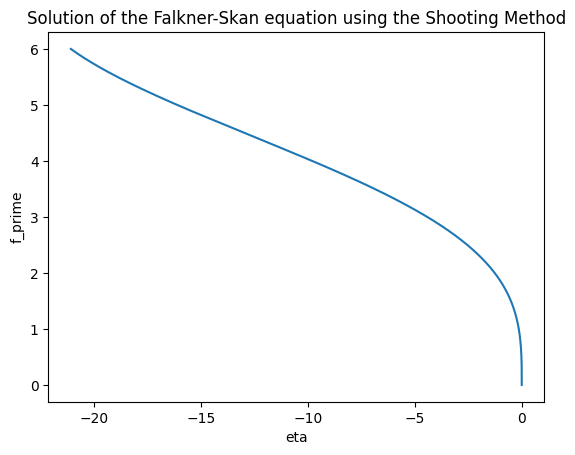

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def shooting_method(alpha, beta, n, eta_max):
    eta = np.linspace(0, eta_max, n)
    f = np.zeros(n)
    f_prime = np.linspace(alpha, beta, n)
    h = eta_max/(n-1)  # Step size
    

    def residual(f_prime):
        resid = np.zeros(n)
        resid[0] = f[0]
        resid[-1] = f[-1] - 1
        for i in range(1, n-1):
            resid[i] = f_prime[i] * f[i] + (f_prime[i] ** 2 - 1) * eta[i]
        return resid
    
    # Fourth-order Runge-Kutta method
    for i in range(1, n):
        k1 = h * f_prime[i-1] * f[i-1] + h * (f_prime[i-1] ** 2 - 1) * eta[i-1]
        k2 = h * (f_prime[i-1] + 0.5 * k1) * (f[i-1] + 0.5 * h * f_prime[i-1]) + h * ((f_prime[i-1] + 0.5 * k1) ** 2 - 1) * (eta[i-1] + 0.5 * h)
        k3 = h * (f_prime[i-1] + 0.5 * k2) * (f[i-1] + 0.5 * h * (f_prime[i-1] + 0.5 * k1)) + h * ((f_prime[i-1] + 0.5 * k2) ** 2 - 1) * (eta[i-1] + 0.5 * h)
        k4 = h * (f_prime[i-1] + k3) * (f[i-1] + h * (f_prime[i-1] + 0.5 * k3)) + h * ((f_prime[i-1] + k3) ** 2 - 1) * (eta[i-1] + h)
        
        f[i] = f[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        
    return eta, f

# parameters
alpha = 1
beta = -0.1
n = 1001
eta_max = 6


eta, f = shooting_method(alpha, beta, n, eta_max)


plt.plot(f, eta)
plt.xlabel('eta')
plt.ylabel('f_prime')
plt.title('Solution of the Falkner-Skan equation using the Shooting Method')
plt.show()


